# Noise
Image noise is random variation of brightness or color information in images.


In [1]:
import numpy as np
import skimage
from skimage.util import random_noise
import cv2

In [2]:
def show_images(images, titles):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    assert len(images) == len(titles)
    for title in titles:
        cv2.namedWindow(title, cv2.WINDOW_NORMAL)
    
    for title, img in zip(titles, images):
        cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# How to use show_images([list of images], [list of titles]) They must have the same length
# show_images([img1, img2], ['This is image 1', 'This is image 2'])

## Random Noise
Gaussian Noise is additive, independent at each pixel, and independent of the signal intensity.

For paractice we will work using `random_noise` from scikit-image library. Check the documentation at https://scikit-image.org/docs/dev/api/skimage.util.html#random-noise

In [ ]:
# Random noise from skimage
import cv2
img = cv2.imread('C:/Users/HP 2019/Desktop/LABSSSSSSSSSSSSSS/lab4-image enhancement and manipulation/assets/original.png', cv2.IMREAD_GRAYSCALE)
img = skimage.img_as_float(img)
n1 = random_noise(img, mode='gaussian', clip=False, var=0.01**2)
n2 = random_noise(img, mode='gaussian', clip=False, var=0.03**2)
n3 = random_noise(img, mode='gaussian', clip=False, var=0.07**2)
#MY CODE
n_subtracted_1=n2-n1
n_subtracted_2=n3-n1
#cv2.imshow('n2-n1',n_subtracted_1)
#cv2.imshow('n3-n1',n_subtracted_2)

show_images([n1, n2, n3], ['random noise at sigma=0.01', 'random noise at sigma=0.03', 'random noise at sigma=0.07'])

TODO: 
* What do you expect if you subtracted n2 and n1?
* What is the mean and variance of the error?
* how do you think we can remove it? The answer is gaussian or mean filters

# My answers:


1-It will give negative value and hence black image if we substracted n1 from n2..It gives error out of range !



2-Mean is zero like mean of n1,n2,n3 (I think :/) !



3-Gaussian because it is a gaussian distributed noise which will be more suitable 


#note:code illustrated above


#TODO:
* What will happen if we averaged noisy images with each others?

In [ ]:
#Answer:
#It will give a noisy image but it will average the noise of all three images
#MY CODE
from matplotlib import pyplot as plt
n_AVG=(n1+n2+n3)/3
plt.imshow(n_AVG,cmap='gray')
plt.show()



## Salt-and-Pepper Noise
"impulsive" noise is sometimes called salt-and-pepper noise or spike noise. An image containing salt-and-pepper noise will have dark pixels in bright regions and bright pixels in dark regions.

In the following code `amount` parameter represents the percentage of pixels affected by salt and pepper noise.

In [ ]:
img = cv2.imread('./assets/original.png', cv2.IMREAD_GRAYSCALE)
img = skimage.img_as_float(img)
n1 = random_noise(img, mode='s&p', clip=False, amount=0.02)
n2 = random_noise(img, mode='s&p', clip=False, amount=0.04)
n3 = random_noise(img, mode='s&p', clip=False, amount=0.08)

show_images([n1, n2, n3], ['Salt & pepper noise at amount=0.02', 'Salt & pepper noise at amount=0.04', 'Salt & pepper noise at amount=0.08'])

TODO: 
* Why can't we use mean or gaussian here?
* What should we do then?

### Median Filter!
The median filter is normally used to reduce noise in an image, somewhat like the mean filter. However, it often does a better job than the mean filter of preserving useful detail in the image.

Like the mean filter, the median filter considers each pixel in the image in turn and looks at its nearby neighbors to decide whether or not it is representative of its surroundings. Instead of simply replacing the pixel value with the mean of neighboring pixel values, it replaces it with the median of those values. The median is calculated by first sorting all the pixel values from the surrounding neighborhood into numerical order and then replacing the pixel being considered with the middle pixel value.

Check https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm for more details

# My answer:
1-Because some edges /details might be lost but median filter keeps them .Edges are of critical importance to the visual appearance of images .


2-We should use median filter.It is effective in removing this kind of noise .

In [ ]:
denoised1 = cv2.medianBlur(skimage.img_as_uint(n1),3)
denoised2 = cv2.medianBlur(skimage.img_as_uint(n2),3)
denoised3 = cv2.medianBlur(skimage.img_as_uint(n3),3)
show_images([denoised1, denoised2, denoised3], ['denoised1', 'denoised2', 'denoised3'])

# Image enhancement

Image enhancement is the procedure of improving the quality and information content of original data before processing. Contrast enhancement or stretching is performed by linear transformation expanding the original range of gray level.

What is contrast of the image?
Contrast can be defined as the effective range of the image $$[ \text{min(I)}, \text{max(I)}]$$ so if the range is small we say that the image has low contrast which means that the details of the image won't be clear!

## Negative transformation
Negative transformation, which is invert of identity transformation. In negative transformation, each value of the input image is subtracted from the max possible intesity and mapped onto the output image.
$$I(x, y)_{new} = \text{max intensity} - I(x, y)$$

TODO: apply negative transform on image `negative.png`

In [ ]:
import numpy as np
img = cv2.imread('C:/Users/HP 2019/Desktop/LABSSSSSSSSSSSSSS/lab4-image enhancement and manipulation/assets/negative.png', cv2.IMREAD_GRAYSCALE)
negative_transformed_img=255-img
max_val=np.amax(img)
min_val=np.amin(img)

print('max value in img',max_val)
print('min value in img',min_val)
show_images([img,negative_transformed_img], ['img', 'negative transformed img'])


#refrence :
#https://www.youtube.com/watch?v=_RGJT6JKO1o
    

max value in img 255
min value in img 21


## Contrast stretching
We said that the contrast of the image is the range between $min(I)$ and $max(I)$ so we will try to **stretch** the contrast a little bit

### Using linear transformation
If an image with range $[0.3, 0.7]$ we can rescale the image to be $[0, 1]$ which will increase the contrast of the image

TODO: Try to rescale `dark.png` to image between $[0, 1]$

In [10]:
import numpy as np
img = cv2.imread('C:/Users/HP 2019/Desktop/LABSSSSSSSSSSSSSS/lab4-image enhancement and manipulation/assets/dark.png', cv2.IMREAD_GRAYSCALE)
max_val=np.amax(img)
min_val=np.amin(img)

print('max value in img',max_val)
print('min value in img',min_val)
height=img.shape[0]
width=img.shape[1]
for i in range(0,height-1,1):   
    for j in range(0,width-1,1):
        new_img[i,j]=(img[i,j]-min_val)/((max_val-min_val)*255)
        
    
show_images([img,new_img], ['img', 'contrasted img'])


"""
I think:
I can write it directly like that without for loop
new_img=(img-min_val)/((max_val-min_val)*255)
show_images([img,new_img], ['img', 'contrasted img'])
"""

    

max value in img 255
min value in img 76


"\nI think I can write it directly like that without for loop\nnew_img=(img-min_val)/((max_val-min_val)*255)\nshow_images([img,new_img], ['img', 'contrasted img'])\n"

## Gamma correction
$$I(x, y)_{new} = c I(x, y)^\gamma$$
![title](./assets/gamma.png)

TODO: Implement gamma correction and test it for `dark.png`

In [20]:
#MY CODE

### I can't figure the error !!!!!!!!  ####

import cv2
import numpy as np
img = cv2.imread('C:/Users/HP 2019/Desktop/LABSSSSSSSSSSSSSS/lab4-image enhancement and manipulation/assets/dark.png', cv2.IMREAD_GRAYSCALE)

def gamma_corr(gamma,img):
    r=img.shape[0]
    c=img.shape[1]
    outputimg=np.zeros((r,c))
    #Assume c (constant)=1
    constant =1 
    outputimg=constant*(np.power(img,gamma))
    return outputimg


#Note: there is an error !
#To test it:
imgGamma25=(4,img)
#cv2.imshow('img_gamma',img_gamma_25)
#cv2.waitKey()
#cv2.destroyAllWindows()

imgGamma10=(10,img)
imgGamma1=gamma_corr(1,img)

show_images([imgGamma25,imgGamma10,imgGamma1], ['imgGamma25', 'imgGamma10','imgGamma1'])

TypeError: Expected Ptr<cv::UMat> for argument 'mat'

## Histogram equalization

### What is a histogram?
* It is a graphical representation of the intensity distribution of an image.
* It quantifies the number of pixels for each intensity value considered.

### What is histogram equalization?
* It is a method that improves the contrast in an image, in order to stretch out the intensity range.
* Check the histogram below. All the intesity values are concentrated in a small region, hence low contrast!

### How do we equalize the histogram?
* First compute the probability of each pixel intensity in the histogram $$P(i) = \frac{\text{Number of occurences of i}}
{\text{Total number of pixels}}$$
* Second Now we have the weights lets start stretching!. We compute the new histogram, let $N$ is the number of bins then $$H(i)_{new} = \text{max possible intensity}\sum_{i \in N} N p(i)$$
![title](./assets/histogram.png)

Let's first plot the histogram and see what is going on!. we will work on `dark.png`

Check https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/histogram_equalization/histogram_equalization.html for details
For calculating the histogram
https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html

In [18]:
img = cv2.imread('./assets/dark.png', cv2.IMREAD_GRAYSCALE)
hist, bins = np.histogram(img.reshape(-1), bins=256)

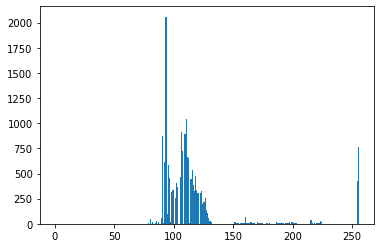

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(img.ravel(),256,[0,256])
plt.show()

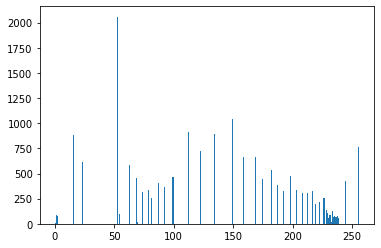

In [8]:
new_img = cv2.equalizeHist(img)
plt.hist(new_img.ravel(),256,[0,256])
plt.show()
show_images([img, new_img], ['original', 'equalized'])

TODO: Try the histogram equalization on `bad_kid.tif`

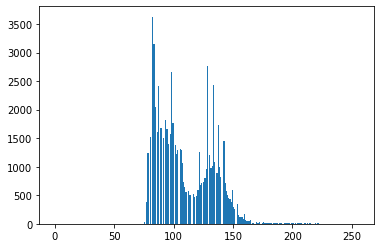

In [3]:
###         MY   CODE ###
img = cv2.imread('./assets/bad_kid.tif', cv2.IMREAD_GRAYSCALE)
hist, bins = np.histogram(img.reshape(-1), bins=256)
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(img.ravel(),256,[0,256])
plt.show()



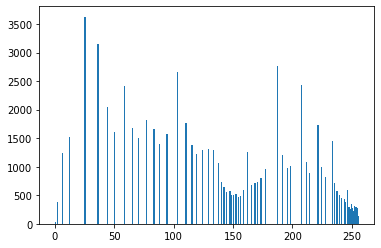

In [ ]:
###   MY CODE ###
new_img = cv2.equalizeHist(img)
plt.hist(new_img.ravel(),256,[0,256])
plt.show()
show_images([img, new_img], ['original', 'equalized'])